### Introduction
> The project is about predicting the price of Electricity Consumed in some location, Base on this project I am using Some areas in Indian as a case study. The dataset consist of Nine Numerical variable including the Target Variable, which is the ElecricityBill, and Two Categorical Data. 
#### Model Used
>The DecesionTreeRegressor was used for the prediction, It is a Supervised Learning Model with the target Variable ElectricityBill

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [89]:
df_p=pd.read_csv('electricity_bill_dataset_processed.csv')
df_p.head()

,Unnamed: 0,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,0,16,23.0,2.0,6.0,1.0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,1,19,22.0,2.0,3.0,1.0,5,Vadodara,NHPC,488,7.8,3806.4
2,2,7,20.0,2.0,6.0,7.0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,3,7,22.0,3.0,21.0,1.0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,4,11,23.0,2.0,11.0,1.0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


In [90]:
#Select Columns that will feature in the analysis
col= df_p.columns[1:]
df= df_p[col]

In [91]:
df.shape

(45345, 11)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  float64
 2   AirConditioner   45345 non-null  float64
 3   Television       45345 non-null  float64
 4   Monitor          45345 non-null  float64
 5   Month            45345 non-null  int64  
 6   City             45345 non-null  object 
 7   Company          45345 non-null  object 
 8   MonthlyHours     45345 non-null  int64  
 9   TariffRate       45345 non-null  float64
 10  ElectricityBill  45345 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 3.8+ MB


In [93]:
df.describe()

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,MonthlyHours,TariffRate,ElectricityBill
count,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000
mean,13.990694,21.705458,1.503959,12.502635,2.865057,6.488058,515.083207,8.369648,4311.771307
std,5.470816,1.672575,1.115482,5.756007,3.894933,3.443252,122.618017,0.576992,1073.886406
min,5.000000,17.000000,0.000000,3.000000,1.000000,1.000000,95.000000,7.400000,807.500000
25%,9.000000,22.000000,1.000000,7.000000,1.000000,3.000000,429.000000,7.900000,3556.800000
50%,14.000000,22.000000,2.000000,13.000000,1.000000,6.000000,515.000000,8.400000,4299.400000
75%,19.000000,23.000000,2.000000,17.000000,1.000000,9.000000,601.000000,8.900000,5038.800000
max,23.000000,23.000000,3.000000,22.000000,12.000000,12.000000,926.000000,9.300000,8286.300000


In [94]:
df['City'].value_counts()

Hyderabad      2914
Navi Mumbai    2914
Ratnagiri      2892
Faridabad      2891
Gurgaon        2878
Ahmedabad      2868
New Delhi      2848
Mumbai         2846
Chennai        2834
Dahej          2821
Nagpur         2816
Noida          2793
Pune           2788
Shimla         2780
Kolkata        2740
Vadodara       2722
Name: City, dtype: int64

In [95]:
df['Company'].value_counts()

Ringfeder Power Transmission India Pvt. Ltd.                          1486
JSW Energy Ltd.                                                       1477
Guj Ind Power                                                         1476
SJVN Ltd.                                                             1471
Maha Transco – Maharashtra State Electricity Transmission Co, Ltd.    1470
NTPC Pvt. Ltd.                                                        1466
Optibelt Power Transmission India Private Limited                     1463
Kalpataru Power                                                       1456
GE T&D India Limited                                                  1453
KEC International                                                     1442
Reliance Power                                                        1441
Orient Green                                                          1427
Torrent Power Ltd.                                                    1426
L&T Transmission & Distri

In [96]:
df.isna().sum()

Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64

In [97]:
df.duplicated().sum()

0

### Exploratory Data Analysis

In [98]:
# Distribution of Numerical Columns
num_col=df.select_dtypes('number').columns
num_col

Index(['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor',
       'Month', 'MonthlyHours', 'TariffRate', 'ElectricityBill'],
      dtype='object')

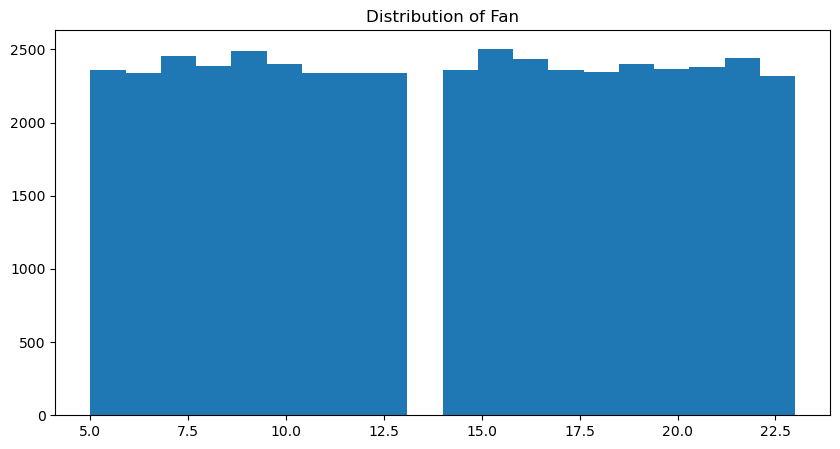

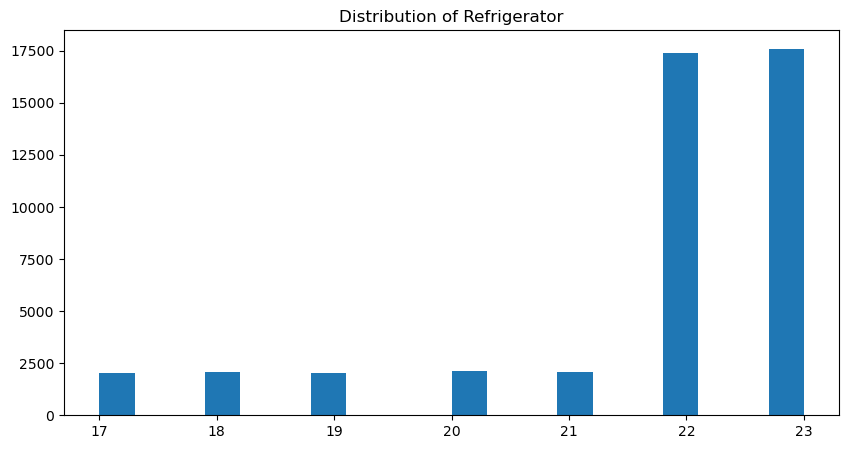

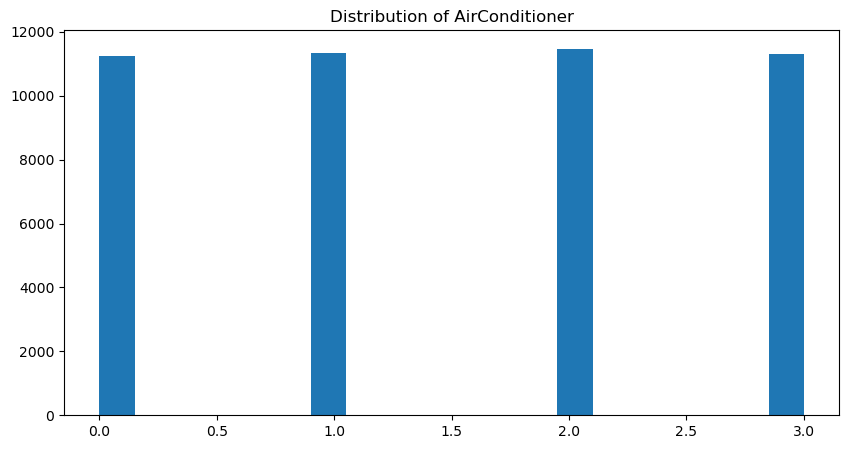

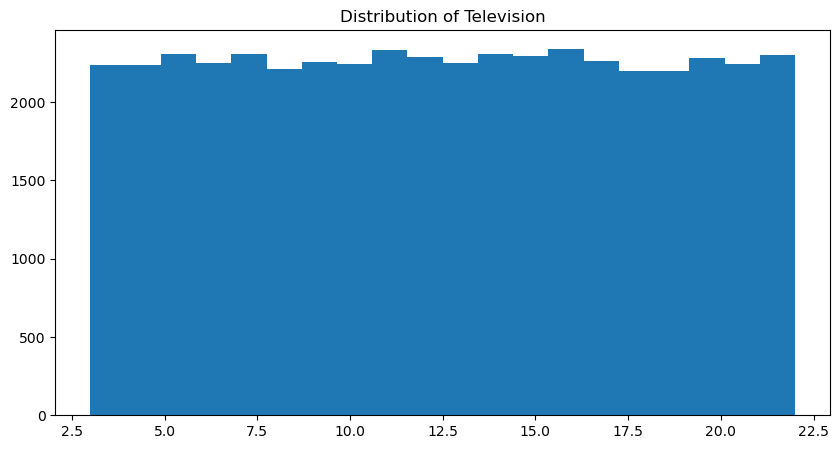

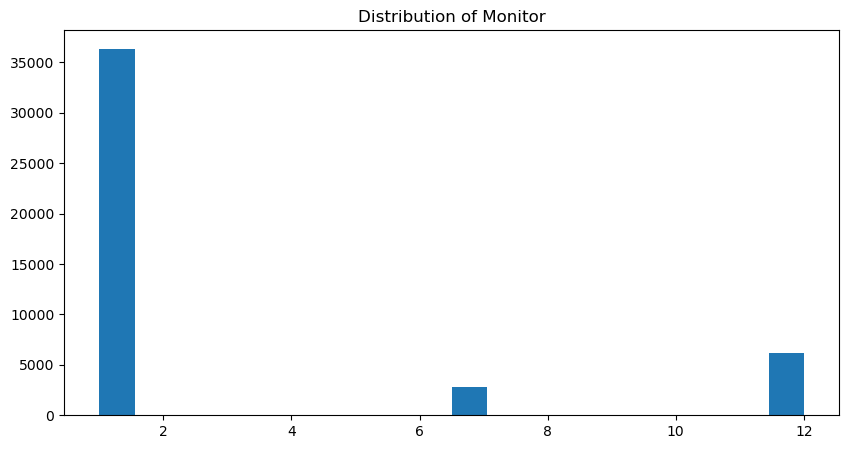

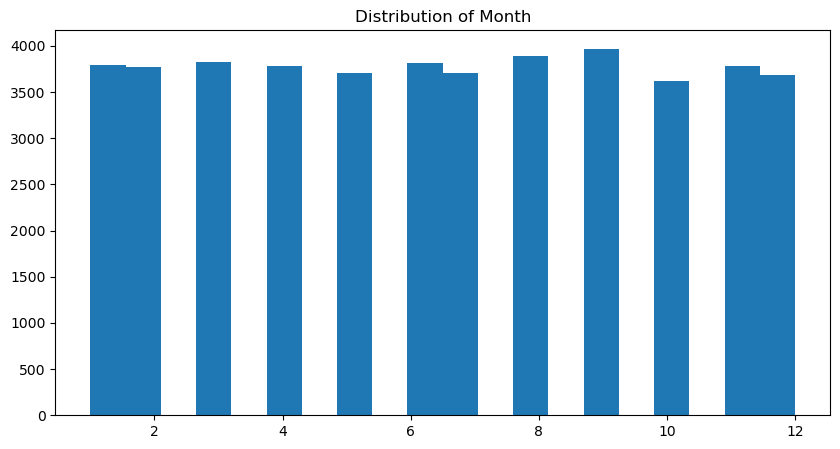

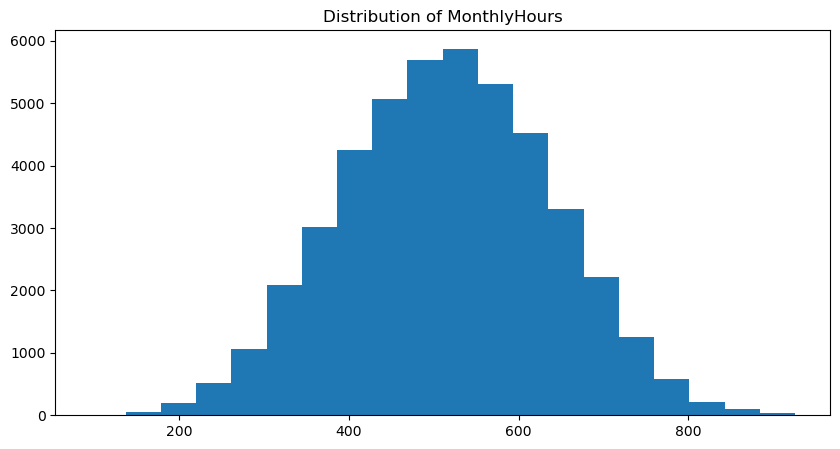

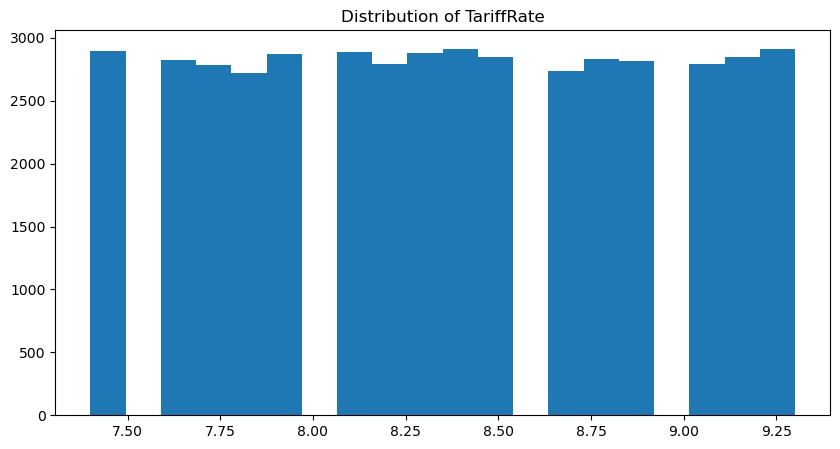

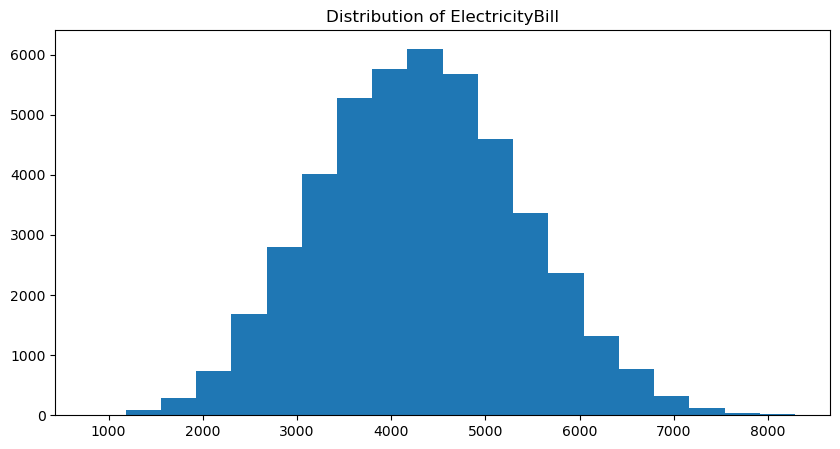

In [99]:
for c in num_col:
    plt.figure(figsize=(10,5))
    plt.hist(df[c], bins=20)
    plt.title(f'Distribution of {c}')
    plt.show()

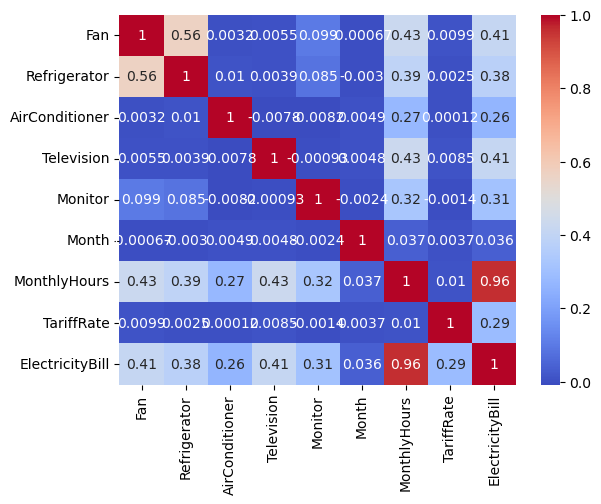

In [100]:
sb.heatmap(df[num_col].corr(), cmap='coolwarm', annot=True);

In [101]:
#let perform p_test on some columns to confirm the correlation

from scipy.stats import pearsonr
fan=df['Fan']


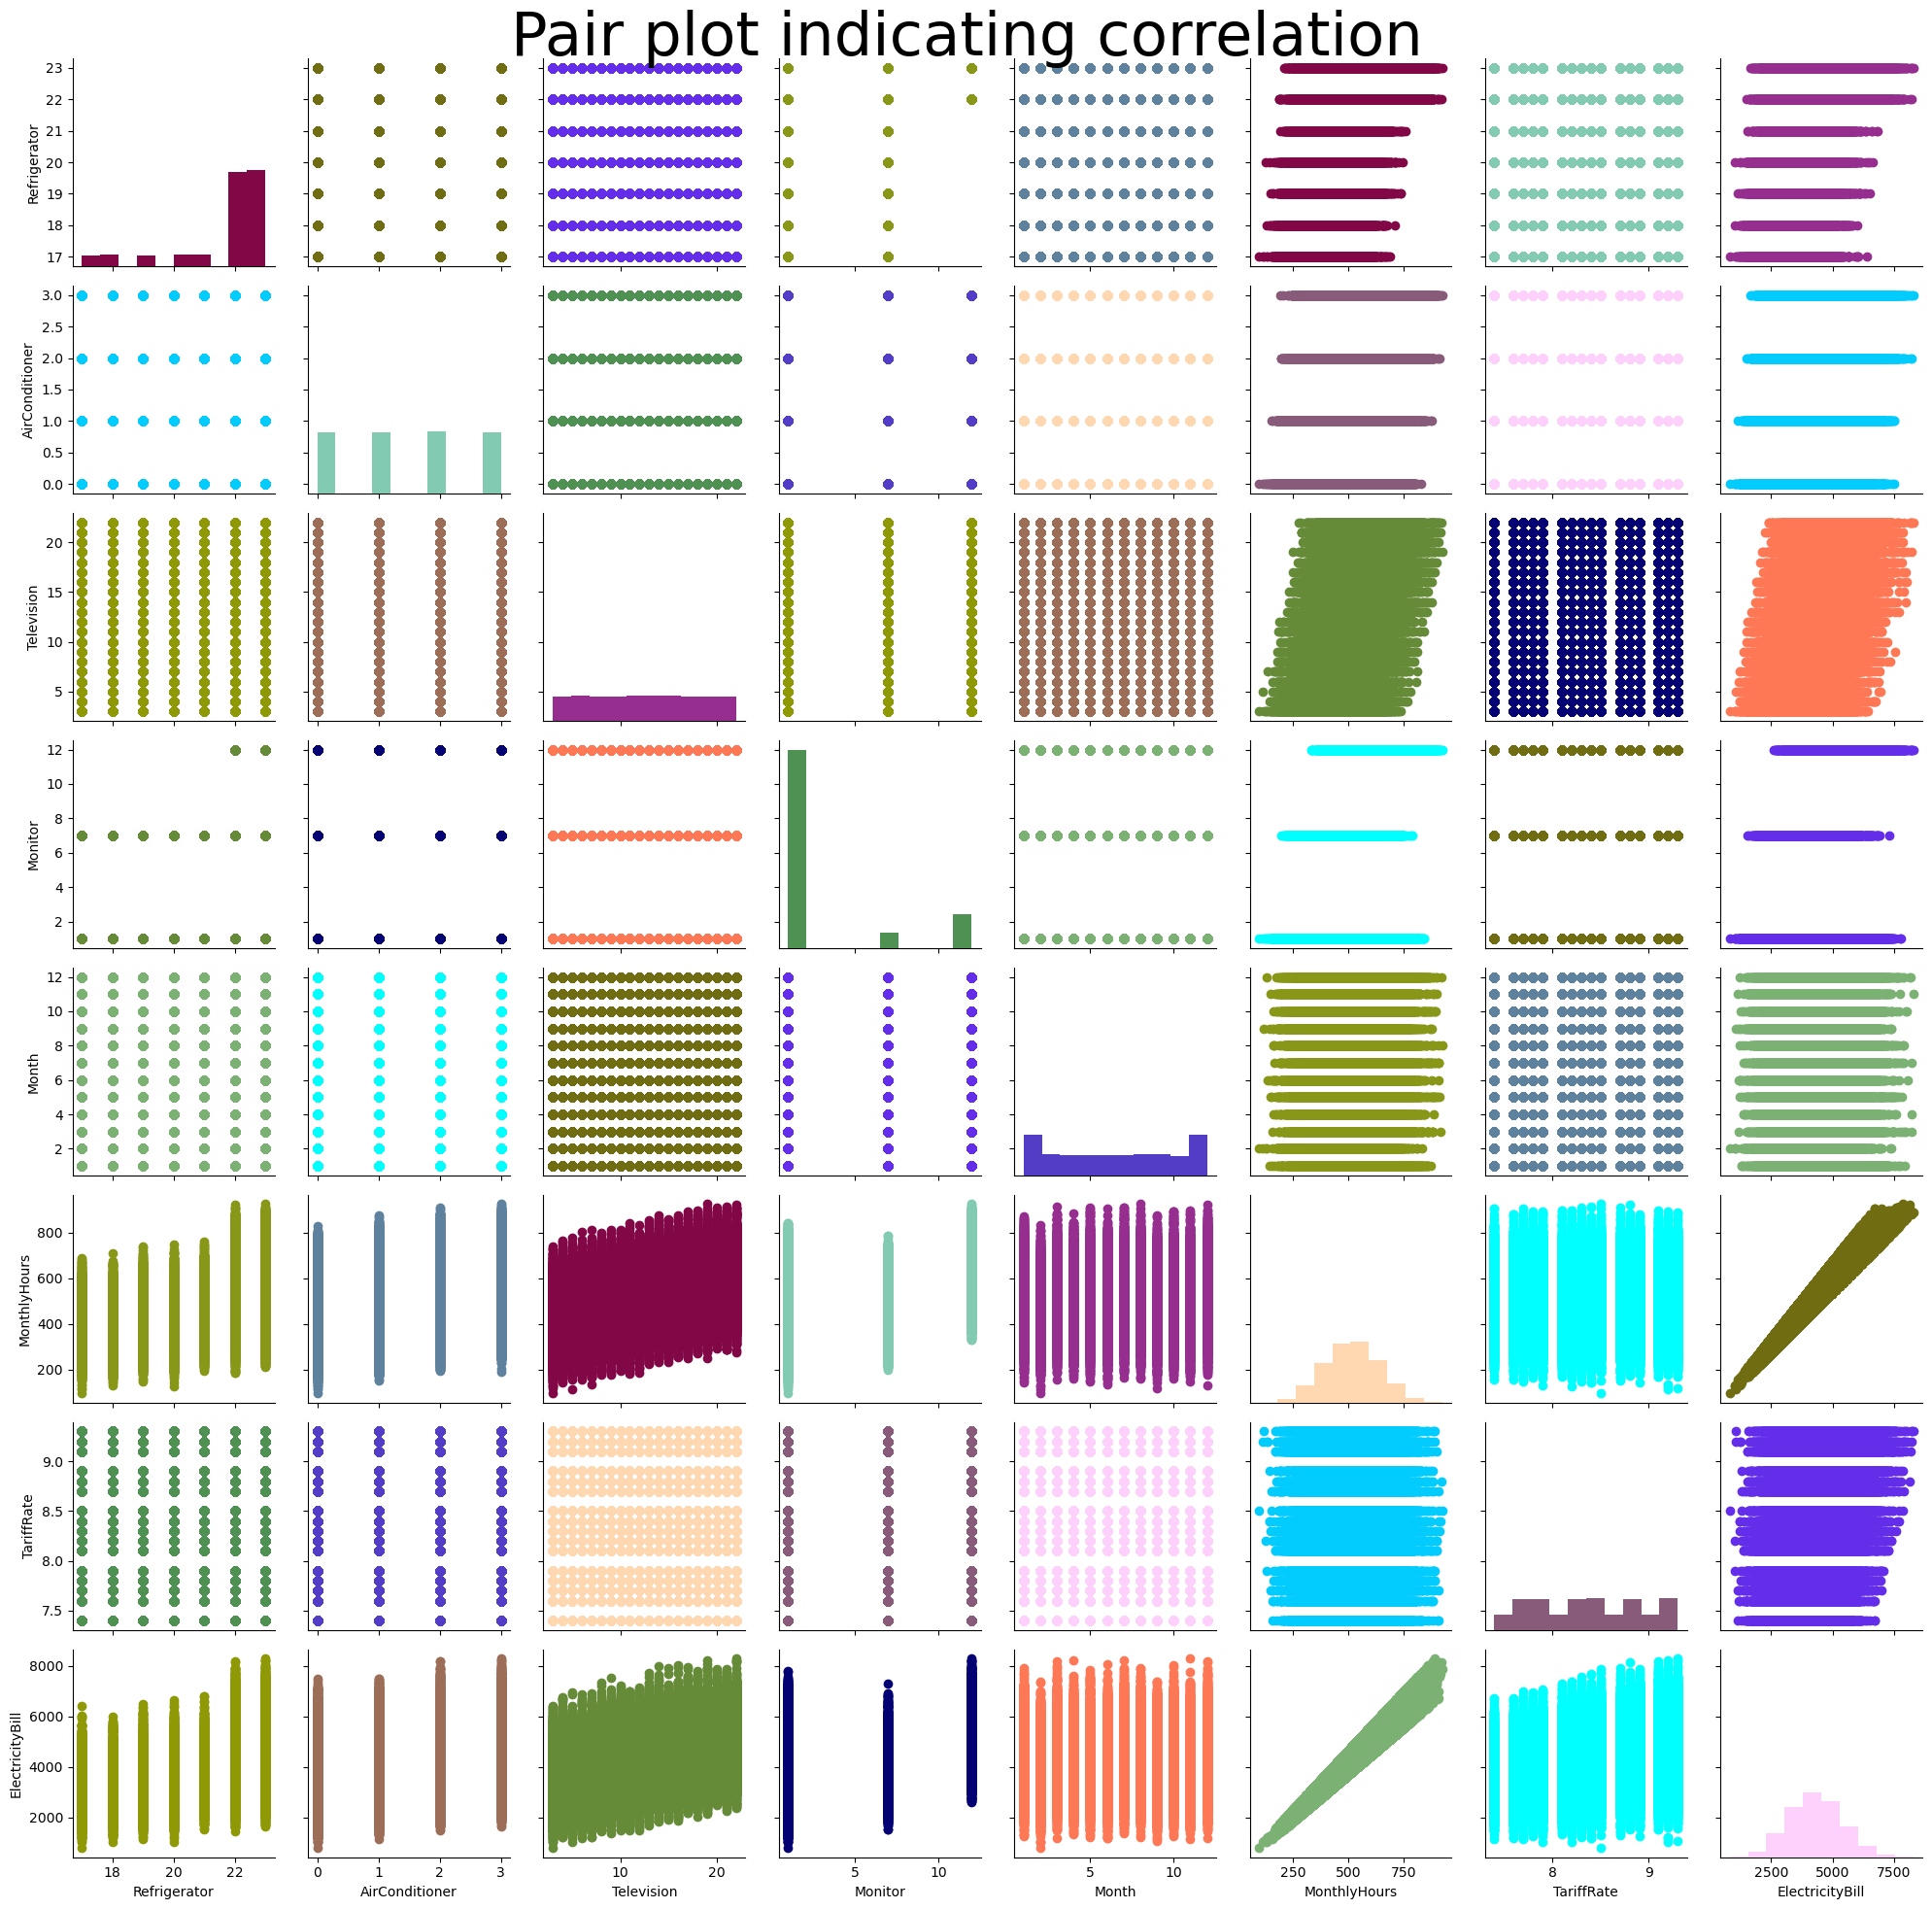

In [102]:
#Let Check for the re;ationship between the numerical columns
colors = iter(['xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple',
       'xkcd:light forest green', 'xkcd:blue with a hint of purple',
       'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve',
       'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish',
       'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon',
       'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green',
       'xkcd:purple blue', 'xkcd:baby shit green', 'xkcd:greyish blue','xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple',
       'xkcd:light forest green', 'xkcd:blue with a hint of purple',
       'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve',
       'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish',
       'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon',
       'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green',
       'xkcd:purple blue', 'xkcd:baby shit green', 'xkcd:greyish blue','xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple',
       'xkcd:light forest green', 'xkcd:blue with a hint of purple',
       'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve',
       'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish',
       'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon',
       'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green',
       'xkcd:purple blue', 'xkcd:baby shit green', 'xkcd:greyish blue',
        'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green',
       'xkcd:purple blue', 'xkcd:baby shit green', 'xkcd:greyish blue'])
def my_scatter(x,y, **kwargs):
    kwargs['color'] = next(colors)
    plt.scatter(x,y, **kwargs)
def my_hist(x, **kwargs):
    kwargs['color'] = next(colors)
    plt.hist(x, **kwargs)
pair_gcol=num_col[1:]
g=sb.PairGrid(data=df,vars=pair_gcol)
g.map_diag(my_hist)
g.map_offdiag(my_scatter)
g.fig.suptitle('Pair plot indicating correlation', fontsize=45)
g.fig.tight_layout()
plt.show()

From the pair plot, it is indicated that Hourly spent or consume actually determine the electricity bil, meaning the two variable are positively correlated to each other

### Modelling

In [103]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRFRegressor
from sklearn.svm import SVR

In [104]:
#Convert the categorical data to numeric by applying LabelEncoder and dummies
df_copy=df.copy()

In [75]:
encoder=LabelEncoder()
# df_copy['Company_encoded']=encoder.fit_transform(df_copy['Company'])

In [105]:
df_copy.drop(columns=['Company'], inplace=True)

In [106]:
df_encoded=pd.get_dummies(df_copy, columns=['City'])

In [107]:
df_encoded.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,MonthlyHours,TariffRate,ElectricityBill,City_Ahmedabad,...,City_Kolkata,City_Mumbai,City_Nagpur,City_Navi Mumbai,City_New Delhi,City_Noida,City_Pune,City_Ratnagiri,City_Shimla,City_Vadodara
0,16,23.0,2.0,6.0,1.0,10,384,8.4,3225.6,0,...,0,0,0,0,0,0,0,0,0,0
1,19,22.0,2.0,3.0,1.0,5,488,7.8,3806.4,0,...,0,0,0,0,0,0,0,0,0,1
2,7,20.0,2.0,6.0,7.0,7,416,7.7,3203.2,0,...,0,0,0,0,0,0,0,0,1,0
3,7,22.0,3.0,21.0,1.0,6,475,9.2,4370.0,0,...,0,1,0,0,0,0,0,0,0,0
4,11,23.0,2.0,11.0,1.0,2,457,9.2,4204.4,0,...,0,1,0,0,0,0,0,0,0,0


In [254]:
scaler2=StandardScaler()
X=df_encoded.drop(columns=['ElectricityBill'])
y= df_encoded['ElectricityBill']

In [253]:
scaler=StandardScaler()

In [109]:
scaled_col= X.columns[:8]
scaled_col

Index(['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor',
       'Month', 'MonthlyHours', 'TariffRate'],
      dtype='object')

In [110]:
#handling the encoded columns
# company_dict=dict(zip(df['Company'], df_encoded['Company_encoded']))

In [111]:
# company_dict_reverse=dict(zip(df_encoded['Company_encoded'], df['Company']))

In [113]:
column=X.columns
column

Index(['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor',
       'Month', 'MonthlyHours', 'TariffRate', 'City_Ahmedabad', 'City_Chennai',
       'City_Dahej', 'City_Faridabad', 'City_Gurgaon', 'City_Hyderabad',
       'City_Kolkata', 'City_Mumbai', 'City_Nagpur', 'City_Navi Mumbai',
       'City_New Delhi', 'City_Noida', 'City_Pune', 'City_Ratnagiri',
       'City_Shimla', 'City_Vadodara'],
      dtype='object')

In [114]:
df_scaled=scaler.fit_transform(X)

In [115]:
df_scaled=pd.DataFrame(df_scaled, columns=column)

In [116]:
x_train,x_test,y_train,y_test=train_test_split(df_scaled, y, random_state=40, test_size=.2, shuffle=True)

In [117]:
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((36276, 24), (9069, 24), (36276,), (9069,))

In [118]:
rand=RandomForestRegressor(n_estimators=100)
rand.fit(x_train,y_train)
feature_scores=pd.Series(rand.feature_importances_, index=X.columns).sort_values(ascending=False)

In [119]:
feature_scores

MonthlyHours        9.202327e-01
TariffRate          7.855252e-02
City_Ratnagiri      2.361478e-04
City_New Delhi      2.013651e-04
City_Nagpur         1.399758e-04
City_Ahmedabad      1.161897e-04
City_Pune           6.794160e-05
City_Kolkata        6.765397e-05
City_Dahej          6.516433e-05
City_Navi Mumbai    5.316473e-05
City_Faridabad      4.452503e-05
City_Shimla         4.397524e-05
City_Gurgaon        4.043197e-05
City_Vadodara       2.582018e-05
City_Hyderabad      2.257997e-05
City_Noida          1.987692e-05
City_Chennai        1.956496e-05
City_Mumbai         1.949085e-05
Fan                 8.809798e-06
Television          7.756376e-06
Month               7.006694e-06
Refrigerator        3.346806e-06
AirConditioner      3.106993e-06
Monitor             8.454512e-07
dtype: float64

#### SELECTING BEST FEATURES FOR THE PREDICTION TO BOOST MODEL PERFORMANCE

In [120]:
col_2_use=feature_scores.index[:-6]

In [154]:
features_eng_data=X[col_2_use]

In [155]:
col_2_use

Index(['MonthlyHours', 'TariffRate', 'City_Ratnagiri', 'City_New Delhi',
       'City_Nagpur', 'City_Ahmedabad', 'City_Pune', 'City_Kolkata',
       'City_Dahej', 'City_Navi Mumbai', 'City_Faridabad', 'City_Shimla',
       'City_Gurgaon', 'City_Vadodara', 'City_Hyderabad', 'City_Noida',
       'City_Chennai', 'City_Mumbai'],
      dtype='object')

In [255]:
features_scaled=scaler2.fit_transform(features_eng_data)

In [256]:
features_scaled=pd.DataFrame(features_scaled, columns=col_2_use)

In [257]:
features_eng_data.to_csv('selected_data.csv',index=False)

In [258]:
X_train,X_test,Y_train,Y_test=train_test_split(features_scaled, y, random_state=40, test_size=.2, shuffle=True)

In [259]:
model={'Linear_Regression':LinearRegression(),
      'RandomForest_Regressor':RandomForestRegressor(),
     'DecisionTree_Regressor':DecisionTreeRegressor(),
      'XGBRF_Regressor':XGBRFRegressor(),
      'SVR':SVR()}

In [260]:
def evaluate_model(model, x_train,x_test,y_train,y_test):
    train_scores=[]
    test_scores=[]
    name=[]
    np.random.seed(50)
    
    for key, model in model.items():
        #fit model
        model.fit(x_train, y_train)
        train_score= model.score(x_train,y_train)
        train_scores.append(train_score)
        test_score=model.score(x_test,y_test)
        test_scores.append(test_score)
        name.append(key)
        df=pd.DataFrame({'model':name,
                        'train_accuracy':train_scores, 'test_accuracy':test_scores})
    return df

In [261]:
%%time
score=evaluate_model(model=model,
                     x_train=X_train,
                     y_train=Y_train,
                     x_test=X_test,
                     y_test=Y_test,
                    )
score

CPU times: total: 6min 9s
Wall time: 6min 23s


,model,train_accuracy,test_accuracy
0,Linear_Regression,0.995668,0.995612
1,RandomForest_Regressor,0.999998,0.999978
2,DecisionTree_Regressor,1.000000,0.999955
3,XGBRF_Regressor,0.993744,0.993443
4,SVR,0.731769,0.728867


From the table above it is shown that LinearRegression, Random Forest, Decision and Xgb perform well both on test data and train data but The decision Treee Regressor happens to the be the best model so far

> We can not actually determine the performance of model with it the score, so let consider applying some metric like mse, RMSE and MAE

In [262]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold

In [263]:
%%time

parameters = {'criterion':['squared_error','absolute_error'],
              'max_depth':np.arange(1,21).tolist()[0::2],
              'min_samples_split':np.arange(2,11).tolist()[0::2],
              'max_leaf_nodes':np.arange(3,26).tolist()[0::2]}

# create an instance of the grid search object
g= GridSearchCV(DecisionTreeRegressor(), parameters, cv=5, n_jobs=-1)

# conduct grid search over the parameter space
g.fit(X_train[:1000],Y_train[:1000])

CPU times: total: 5.03 s
Wall time: 51.1 s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_leaf_nodes': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                            23, 25],
                         'min_samples_split': [2, 4, 6, 8, 10]})

In [264]:
best_param=g.best_params_
best_param

{'criterion': 'squared_error',
 'max_depth': 5,
 'max_leaf_nodes': 25,
 'min_samples_split': 2}

In [265]:
best_score=g.best_score_
best_score

0.9650351980657783

In [266]:
d_tree= DecisionTreeRegressor(criterion='squared_error', max_depth=5, max_leaf_nodes=25, min_samples_split=2)

In [267]:
d_tree.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=25)

In [268]:
tree=DecisionTreeRegressor()

In [269]:
tree.fit(X_train,Y_train)

DecisionTreeRegressor()

In [270]:
random=RandomForestRegressor()

In [271]:
predict_=tree.predict(X_test)

In [272]:
mae=mean_absolute_error(Y_test,predict_)
print('the mean absolute error  is', mae)

the mean absolute error  is 0.9454074319110318


In [273]:
rmse=np.sqrt(mean_squared_error(Y_test,predict_))
print('root mean square of the model without tunning is ',rmse)

root mean square of the model without tunning is  7.509918974799232


In [274]:
r2_score1=r2_score(Y_test,predict_)
r2_score1

0.9999509700012199

In [275]:
mae=mean_absolute_error(Y_test,predicted)
print('the mean absolute error for tunned model is', mae)

the mean absolute error for tunned model is 158.75498725400328


In [276]:
rmse=np.sqrt(mean_squared_error(Y_test,predicted))
rmse

195.1039559315518

In [277]:
random.fit(X_train,Y_train)
predicted_rand=random.predict(X_test)

In [286]:
mae=mean_absolute_error(Y_test,predicted_rand)
print('the mean absolute error TO randomforest  is', mae)
rmse=np.sqrt(mean_squared_error(Y_test,predicted_rand))
print('The root mean square of the model using RandomForestregressor is ',rmse)

the mean absolute error TO randomforest  is 0.7701496306121579
The root mean square of the model using RandomForestregressor is  4.829337480675778


In [279]:
r2_score2=r2_score(Y_test,predicted_rand)
round(r2_score2,3)

1.0

In [280]:
import pickle
pickle_model=open('model.pickle','wb')
pickle.dump(tree, pickle_model)
pickle_model.close()

In [282]:
pickle_model=open('scaler2.pickle','wb')
pickle.dump(scaler2, pickle_model)
pickle_model.close()

In [284]:
pickle_scaler=open('scaler2.pickle','wb')
pickle.dump(scaler2, pickle_scaler)
pickle_scaler.close()

### Conclussion
>The appliances columns and company columns was actually remove before training, This is to improve the model performance, Because even with the existence of the removed variable their is no significant change in the model accuracy.

>RandomForest, Decision Tree, Linear Regression and Xgb actually did well with the model but SVM does not actually match with the model.

>I decided to Use The DecisionTreeRegression for the model with MEAN ABSOLUTE ERROR OF 0.945, ROOT MEAN SQUARE 7.509, R2_SCORE OF 0.99

>I also Decided to overlook the GridsearchCv Hyperparamete Tunning

>The model is still a work in progress